
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Thursday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1. Bias-variance (30pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [33]:
import numpy as np
np.random.seed(11)
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)

We want to build a model that can predict y for unknown inputs x.

(a) (10pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test), fitted model (prediction on x_all vs x_all), and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

(b) (15pts) Fit polynomial models of degrees 2, 3 and 4, and the two given MLP Regression models (these two models will run for a different number of iterations when you fit them) to the training data. Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

(c) (5pts) Which of the polynomial models performed the best? Explain using the bias-variance tradeoff.


## Answer
(a)

Linear Regression Test MSE: 1204.25


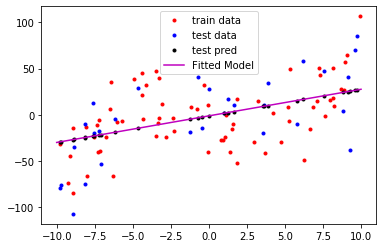

In [34]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
%matplotlib inline
# %pylab inline

linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
testpreds = linreg.predict(x_test)
allpreds = linreg.predict(x_all)
print('Linear Regression Test MSE: %.2f' % mse(y_test, testpreds))

plt.plot(x_train, y_train, 'ro', label='train data', markersize=3)
plt.plot(x_test, y_test, 'b.', label='test data')
plt.plot(x_test, testpreds, 'ko', label='test pred', markersize=3)
plt.plot(x_all, allpreds, 'm', label='Fitted Model')
plt.legend(loc='best')
plt.show()

(b)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh', random_state=11)
mlp_1.fit(x_train, y_train)
print('MLP1 Train MSE: %.2f' % mse(y_train, mlp_1.predict(x_train)))
print('MLP1 Test MSE: %.2f' % mse(y_test, mlp_1.predict(x_test)))
print('\n')


mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh', random_state=11)
mlp_2.fit(x_train, y_train)
print('MLP2 Train MSE %.2f' % mse(y_train, mlp_2.predict(x_train)))
print('MLP2 Test MSE: %.2f' % mse(y_test, mlp_2.predict(x_test)))
print('\n')

poly2 = PolynomialFeatures()
xtrain_poly2 = poly2.fit_transform(x_train)
xtest_poly2 = poly2.fit_transform(x_test)
xall_poly2 = poly2.fit_transform(x_all)
poly2model = linear_model.LinearRegression()
poly2model.fit(xtrain_poly2, y_train)
print('2nd Degree Train MSE: %.2f' % mse(y_train, poly2model.predict(xtrain_poly2)))
print('2nd Degree TEST MSE: %.2f' % mse(y_test, poly2model.predict(xtest_poly2)))
print('\n')

poly3 = PolynomialFeatures(3)
xtrain_poly3 = poly3.fit_transform(x_train)
xtest_poly3 = poly3.fit_transform(x_test)
xall_poly3 = poly3.fit_transform(x_all)
poly3model = linear_model.LinearRegression()
poly3model.fit(xtrain_poly3, y_train)
print('3rd Degree Train MSE: %.2f' % mse(y_train, poly3model.predict(xtrain_poly3)))
print('3rd Degree Test MSE: %.2f' % mse(y_test, poly3model.predict(xtest_poly3)))
print('\n')

poly4 = PolynomialFeatures(4)
xtrain_poly4 = poly4.fit_transform(x_train)
xtest_poly4 = poly4.fit_transform(x_test)
xall_poly4 = poly4.fit_transform(x_all)
poly4model = linear_model.LinearRegression()
poly4model.fit(xtrain_poly4, y_train)
print('4th Degree Train MSE: %.2f' % mse(y_train, poly4model.predict(xtrain_poly4)))
print('4th Degree Test MSE: %.2f' % mse(y_test, poly4model.predict(xtest_poly4)))

MLP1 Train MSE: 647.23
MLP1 Test MSE: 1098.82


MLP2 Train MSE 1032.03
MLP2 Test MSE: 1457.89


2nd Degree Train MSE: 959.52
2nd Degree TEST MSE: 1276.39


3rd Degree Train MSE: 624.54
3rd Degree Test MSE: 1152.28


4th Degree Train MSE: 622.41
4th Degree Test MSE: 1183.20


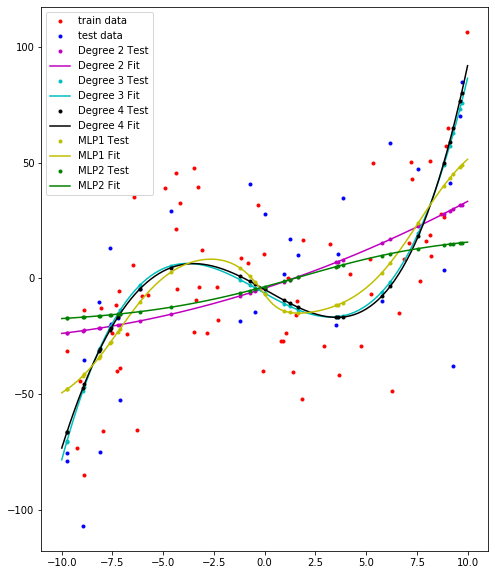

In [36]:
plt.figure(figsize=[8, 10])
plt.plot(x_train, y_train, 'ro', label='train data', markersize=3)
plt.plot(x_test, y_test, 'bo', label='test data', markersize=3)
plt.plot(x_test, poly2model.predict(xtest_poly2), 'mo', label='Degree 2 Test', markersize=3)
plt.plot(x_all, poly2model.predict(xall_poly2), 'm', label='Degree 2 Fit')
plt.plot(x_test, poly3model.predict(xtest_poly3), 'co', label='Degree 3 Test', markersize=3)
plt.plot(x_all, poly3model.predict(xall_poly3), 'c', label='Degree 3 Fit')
plt.plot(x_test, poly4model.predict(xtest_poly4), 'ko', label='Degree 4 Test', markersize=3)
plt.plot(x_all, poly4model.predict(xall_poly4), 'k', label='Degree 4 Fit')
plt.plot(x_test, mlp_1.predict(x_test), 'yo', label='MLP1 Test', markersize=3)
plt.plot(x_all, mlp_1.predict(x_all), 'y', label='MLP1 Fit')
plt.plot(x_test, mlp_2.predict(x_test), 'go', label='MLP2 Test', markersize=3)
plt.plot(x_all, mlp_2.predict(x_all), 'g', label='MLP2 Fit')
plt.legend(loc='best')
plt.show()

(c) 

Answer: The 3rd degree polynomial is the best of our polynomial models although MLP1 has the best test MSE of the 5 models. The degree 3 model is preferable over our degree 2 and degree 4 models because it achieves the lowest bias and variance of the 3. A degree 2 model is a high bias but low variance model (underfit) relative to the others whereas the degree 4 model represents a low bias high variance model (overfit).  

# Question 2. Number of data points required for Linear Regression (30pts)

In this question, we will explore empirically estimating a known data distribution. Let the data be generated by the probabilistic model $y_i = w^T x_i + \epsilon$. Here $x$ is 10 dimensional, and it's features are uniformly drawn values from $0$ to $1$. The true coefficients $w$ are set to be $1, 2, 3, \dots, 10$. Epsilon is drawn from a 0 mean unit variance normal distribution. We can now estimate these true coefficients by using linear regression on sample data points from the distribution. 

1. Generate 100 sample points $(x, y)$ according to the above distribution. Use the [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) function. (2pts)
2. Fit a linear regression model through the above data and report the MSE. (3 pts)
3. Generate 50 sample points $(x, y)$ to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)
4. In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use $MSE(coefficients)$ which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted $y$ and the true $y$ which is commonly used. Hence, $MSE(coefficients) = \frac{1}{num\_coefficients}\sum_{i=1}^{num\_coefficients} (\theta_i - \hat{\theta}_i)^2$ where $\theta_i$ are the true coefficients and $\hat{\theta}_i$ are the estimated coefficients.
Using the $MSE(coefficients)$ as the metric, about how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate $x$ which is 3 dimensional (instead of 10 dimensional as before) and the corresponding $y$ for each $x$. In this case, when $x$ is three dimensional, how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes).(15pts)


1.

In [59]:
np.random.seed(11)
w_true = np.arange(10)+1
x = np.random.uniform(size=(100, 10))
e = np.random.normal(size=(100))
y = np.matmul(x, w_true)+e

2.

In [60]:
model = linear_model.LinearRegression()
model.fit(x, y)
print('The MSE is: %.5f' % mse(y, model.predict(x)))

The MSE is: 1.01344


3.

Coefficients are [ 1.03277196  1.93345918  2.83480808  3.9280535   4.87303922  5.97225152
  7.01485388  8.23170043  8.94561766 10.00432909]


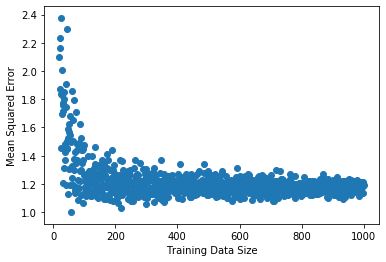

In [61]:
np.random.seed(11)
p3_xtest = np.random.uniform(size=(50, 10))
p3_etest = np.random.normal(size=(50))
p3_ytest = np.matmul(p3_xtest, w_true)+p3_etest
MSElist = []
np.random.seed(11)
for n in range(20, 1001):
    p3_xtrain = np.random.uniform(size=(n, 10))
    p3_etrain = np.random.normal(size=(n))
    p3_ytrain = np.matmul(p3_xtrain, w_true)+p3_etrain
    model.fit(p3_xtrain, p3_ytrain)
    MSElist.append(mse(p3_ytest, model.predict(p3_xtest)))
    if mse(p3_ytest, model.predict(p3_xtest)) == min(MSElist):
        bestmodel = model.fit(p3_xtrain, p3_ytrain)
plt.scatter(range(20, 1001), MSElist)
plt.xlabel('Training Data Size')
plt.ylabel('Mean Squared Error')
print('Coefficients are', bestmodel.coef_)

4. 

In [66]:
# Using all coefficients
from statistics import mean
numdata=[]
np.random.seed(11)
for i in range(0,10):
    for n in range(20, 1001):
        p4_x = np.random.uniform(size=(n, 10))
        p4_e = np.random.normal(size=(n)) 
        p4_y = np.matmul(p4_x, w_true)+p4_e
        model.fit(p4_x,p4_y)
        mse_coef=mse(w_true, model.coef_)
        if mse_coef < 0.01:
            numdata.append(n)
            break
avgdatasize=mean(numdata)
print('Average Data Size:', avgdatasize)

Average Data Size: 277.2


In [65]:
# Using only 1st 3 features
numdata=[]
new_w_true = w_true[0:3]
np.random.seed(11)
for i in range(0,10):
    for n in range(20, 1001):
        threedim_x = np.random.uniform(size=(n, 3))
        threedim_e = np.random.normal(size=(n)) 
        threedim_y = np.matmul(threedim_x, new_w_true)+threedim_e
        model.fit(threedim_x,threedim_y)
        mse_coef=mse(new_w_true, model.coef_)
        if mse_coef <0.01:
            numdata.append(n)
            break
avgdatasize=mean(numdata)
print('Average Data Size for 3D subspace:', avgdatasize)

Average Data Size for 3D subspace: 90.7


# Question 3. Data Imputation Strategies (20pts)

The missing value problem is inevitable in predictive modeling and in order to build a useful model, it is important that these missing values are handled appropriately. There could be many reasons for the presence of missing values(represented as NaN in python) in the dataset, like the absence of information corresponding to the variable, failure to record the available value of the variable, some unknown semantics associated with NaN, etc. 

For the given dataset(file named q3_dataset.csv), fit a Linear Regression model to predict the dependent variable 'ViolentCrimesPerPop'. If you directly try to fit a model you would see an error saying that input contains NaN. So, in order to successfully fit a model, you need to handle these missing values and the performance of your model would depend on how you handle them. 

Your task is to try different imputation strategies for the different columns having missing values and see what works best. You could try the following -
1. Discard rows with missing data
2. Fill NaNs with 0s
3. Fill NaNs with column mean/mode/median
4. Use information from related columns (think of how you could do this)

A strategy could work better for one column and not work for another. Briefly justify why do you think that a particular strategy works better than the other.

Hint: Think about how do the missing values occur for a particular column like are they random or systematic, do they have any semantics?

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error as mae
import numpy as np

dataset = pd.read_csv('q3_dataset.csv')
print("Column-wise missing value percentage")
print(dataset.isnull().sum()/len(dataset)*100)

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)


Column-wise missing value percentage
ViolentCrimesPerPop     0.000000
PolicBudgPerPop        84.002006
population              9.979940
householdsize          19.959880
numbUrban               7.321966
pctUrban                0.000000
medIncome               0.000000
perCapInc               0.000000
LandArea                0.000000
PopDens                 0.000000
PolicCars              84.002006
PctUnemployed           4.964895
PctEmploy               4.964895
dtype: float64


### Answer

In [21]:
# PopDens = Pop/LandArea so middle school math
mask = dataset['population'].isnull()
dataset.loc[mask, 'population'] = dataset['PopDens']*dataset['LandArea']

# We want to be robust to outliers and opt for median rather than mean
mask1 = dataset['householdsize'].isnull()
mask2 = dataset['householdsize'].notnull()
dataset.loc[mask1, 'householdsize'] = dataset.loc[mask2, 'householdsize'].median()

# pctUrban = (numUrban / Pop)*100 so middle school math 
mask1 = dataset['numbUrban'].isnull()
dataset.loc[mask1, 'numbUrban'] = dataset['pctUrban']*dataset['population']/100

# PctUnemployed is missing values in only 5% of data; aggregate statistic should be satisfactory
# I considered PctUnemp = 100-PctEmploy but there was no change to the MSE
mask1 = dataset['PctUnemployed'].isnull()
mask2 = dataset['PctUnemployed'].notnull()
dataset.loc[mask1, 'PctUnemployed'] = dataset.loc[mask2, 'PctUnemployed'].mean()

# Same logic as PctUnemployed
mask1 = dataset['PctEmploy'].isnull()
mask2 = dataset['PctEmploy'].notnull()
dataset.loc[mask1, 'PctEmploy'] = dataset.loc[mask2, 'PctEmploy'].mean()

# A lot of PolicBudgPerPop and PolicCars is missing values
# Aggregate statistic is unlikely to be representative of full dataset so just drop the columns
X = dataset.drop(['PolicBudgPerPop', 'PolicCars', 'ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)
reg = linear_model.LinearRegression().fit(X_train,Y_train)
Y_test_pred = reg.predict(X_test)
print('The MSE is: %.5f' % mse(Y_test, Y_test_pred))
print('The MAE is: %.5f' % mae(Y_test, Y_test_pred))
X_train.corr(method='pearson')

The MSE is: 0.03587
The MAE is: 0.13641


,population,householdsize,numbUrban,pctUrban,medIncome,perCapInc,LandArea,PopDens,PctUnemployed,PctEmploy
population,1.000000,-0.050032,0.919249,0.234563,-0.093866,-0.040321,0.704847,0.228972,0.114941,0.006028
householdsize,-0.050032,1.000000,-0.034331,-0.016265,0.179823,-0.125382,0.002068,-0.042389,0.129101,0.094332
numbUrban,0.919249,-0.034331,1.000000,0.332729,-0.019440,0.022909,0.716112,0.249882,0.091492,0.038822
pctUrban,0.234563,-0.016265,0.332729,1.000000,0.348515,0.340761,0.087248,0.330752,-0.226250,0.298691
medIncome,-0.093866,0.179823,-0.019440,0.348515,1.000000,0.893939,-0.052932,0.004695,-0.651930,0.632425
perCapInc,-0.040321,-0.125382,0.022909,0.340761,0.893939,1.000000,-0.039841,0.055234,-0.653695,0.485526
LandArea,0.704847,0.002068,0.716112,0.087248,-0.052932,-0.039841,1.000000,-0.153965,0.050489,0.038446
PopDens,0.228972,-0.042389,0.249882,0.330752,0.004695,0.055234,-0.153965,1.000000,0.137784,0.013458
PctUnemployed,0.114941,0.129101,0.091492,-0.226250,-0.651930,-0.653695,0.050489,0.137784,1.000000,-0.700275
PctEmploy,0.006028,0.094332,0.038822,0.298691,0.632425,0.485526,0.038446,0.013458,-0.700275,1.000000


# Question 4. PCA (conceptual) (5pts)

True or False : The goal of PCA is to create a lower-dimensional representation with principal components that are best at predicting the output variable.
Justify your answer

Answer: False. PCA is an unsupervised learning technique that is used to create lower-dimensional representations of our data while still containing most of the information (variance) in the data. However, because it is unsupervised there is no "output variable" to predict.